# License 
***
Copyright (C) 2017 J. Patrick Hall, jphall@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
# imports
import h2o 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.kmeans import H2OKMeansEstimator
from h2o.estimators.pca import H2OPrincipalComponentAnalysisEstimator

In [2]:
# display matplotlib graphics in notebook
%matplotlib inline

In [3]:
# start and connect to h2o server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_112"; Java(TM) SE Runtime Environment (build 1.8.0_112-b16); Java HotSpot(TM) 64-Bit Server VM (build 25.112-b16, mixed mode)
  Starting server from /Users/phall/anaconda/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmpwcyoy_n6
  JVM stdout: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmpwcyoy_n6/h2o_phall_started_from_python.out
  JVM stderr: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmpwcyoy_n6/h2o_phall_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster version:,3.10.4.1
H2O cluster version age:,15 days
H2O cluster name:,H2O_from_python_phall_3uj259
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [4]:
# load clean data
path = '/Users/phall/workspace/GWU_data_mining/03_regression/data/loan_clean.csv'

In [5]:
# define input variable measurement levels 
# strings automatically parsed as enums (nominal)
# numbers automatically parsed as numeric
col_types = {'bad_loan': 'enum',
             'GRP_addr_state': 'enum',
             'GRP_home_ownership': 'enum',
             'GRP_verification_status': 'enum',
             'GRP_REP_home_ownership': 'enum',
             'GRP_purpose': 'enum'}

In [6]:
frame = h2o.import_file(path=path, col_types=col_types) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
frame.describe()

Rows:163987
Cols:18




,id,bad_loan,GRP_REP_home_ownership,GRP_addr_state,GRP_home_ownership,GRP_purpose,GRP_verification_status,_WARN_,STD_IMP_REP_annual_inc,STD_IMP_REP_delinq_2yrs,STD_IMP_REP_dti,STD_IMP_REP_emp_length,STD_IMP_REP_int_rate,STD_IMP_REP_loan_amnt,STD_IMP_REP_longest_credit_lengt,STD_IMP_REP_revol_util,STD_IMP_REP_term_length,STD_IMP_REP_total_acc
type,int,enum,enum,enum,enum,enum,enum,int,real,real,real,real,real,real,real,real,real,real
mins,10001.0,,,,,,,NaN,-1.767455639,-0.39219617,-2.119639396,-1.6213902740000001,-1.907046215,-1.587129405,-2.22445124,-2.164541326,-0.516495577,-2.058861889
mean,91994.0,,,,,,,0.0,2.38744452882879e-11,2.2959296297769782e-12,6.807013811211564e-11,-3.566867876239133e-11,-8.948753565861857e-12,8.311927579716105e-11,5.0612534090153816e-11,-1.4734128080190765e-11,-1.5009542966560638e-10,8.060924856225354e-13
maxs,173987.0,,,,,,,NaN,4.6180619798,4.1566950661,3.0371487270000004,1.2288169612,2.8376799992,2.7671323946,3.1431598296,3.0363495275,1.9718787627,3.0684672884
sigma,47339.11363414683,,,,,,,-0.0,0.9999999999982868,0.9999999999212518,1.0000000000037712,1.0000000000339833,1.0000000000199503,0.999999999985285,0.9999999999850594,1.000000000017688,1.0000000000642086,1.0000000000331841
zeros,0,,,,,,,0,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,163987,0,0,0,0,0,0,0,0,0,0
0,10001.0,0,3,14,3,3,2,nan,-1.1992995020000001,-0.39219617,1.5712460425,1.2288169612,-0.7047730510000001,-1.019182214,1.6839024850000002,1.1858716502,-0.516495577,-1.359278248
1,10002.0,1,3,10,3,8,2,nan,-1.04507688,-0.39219617,-1.9861534850000002,-1.6213902740000001,0.3572732234,-1.3347084310000001,-0.42059567400000003,-1.7882703350000002,1.9718787627,-1.7965180230000002
2,10003.0,0,3,7,3,7,3,nan,-1.501267394,-0.39219617,-0.9556422520000001,1.2288169612,0.5158905241,-1.34732948,-0.7212382690000001,1.7782983174,-0.516495577,-1.271830292


In [8]:
# assign target and inputs
y = 'bad_loan'
X = [name for name in frame.columns if name not in ['id', '_WARN_', y]]
print(y)
print(X)

bad_loan
['GRP_REP_home_ownership', 'GRP_addr_state', 'GRP_home_ownership', 'GRP_purpose', 'GRP_verification_status', 'STD_IMP_REP_annual_inc', 'STD_IMP_REP_delinq_2yrs', 'STD_IMP_REP_dti', 'STD_IMP_REP_emp_length', 'STD_IMP_REP_int_rate', 'STD_IMP_REP_loan_amnt', 'STD_IMP_REP_longest_credit_lengt', 'STD_IMP_REP_revol_util', 'STD_IMP_REP_term_length', 'STD_IMP_REP_total_acc']


In [9]:
# train k-means cluster model
# data is already standardized
# w/ 3 clusters
# print summary
clusters = H2OKMeansEstimator(standardize=False, k=3, seed=12345)
clusters.train(x=X, training_frame=frame)
print(clusters)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1489875889040_1


ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 1624356.9966350778
Total Sum of Square Error to Grand Mean: 2079508.988208857
Between Cluster Sum of Square Error: 455151.99157377915
Centroid Statistics: 


,centroid,size,within_cluster_sum_of_squares
,1.0,32540.0,348350.7501940
,2.0,62511.0,698165.9424155
,3.0,68936.0,577840.3040256


Scoring History: 


,timestamp,duration,iteration,number_of_reassigned_observations,within_cluster_sum_of_squares
,2017-03-18 18:24:54,0.013 sec,0.0,nan,nan
,2017-03-18 18:24:55,0.732 sec,1.0,163987.0,3066962.6306723
,2017-03-18 18:24:55,0.929 sec,2.0,27188.0,1685109.9572629
,2017-03-18 18:24:55,0.968 sec,3.0,12103.0,1639657.0563031
,2017-03-18 18:24:55,1.007 sec,4.0,5808.0,1629782.4700017
,2017-03-18 18:24:55,1.042 sec,5.0,3207.0,1626920.9520747
,2017-03-18 18:24:55,1.069 sec,6.0,2227.0,1625699.4497081
,2017-03-18 18:24:55,1.099 sec,7.0,1620.0,1625066.3038514
,2017-03-18 18:24:55,1.142 sec,8.0,1245.0,1624713.2196611
,2017-03-18 18:24:55,1.173 sec,9.0,905.0,1624514.2903116


In [10]:
# join cluster labels to original data for further analysis
labels = clusters.predict(frame)
labeled_frame =  frame.cbind(labels)
labeled_frame[-1].head()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


predict
2
2
2
1
2
2
2
2
0
1


In [11]:
# determine column types
reals, enums = [], []
for key, val in labeled_frame.types.items():
    if key in X:
        if val == 'enum':
            enums.append(key)
        else: 
            reals.append(key)

print(enums)
print(reals)

['GRP_home_ownership', 'GRP_verification_status', 'GRP_REP_home_ownership', 'GRP_addr_state', 'GRP_purpose']
['STD_IMP_REP_loan_amnt', 'STD_IMP_REP_delinq_2yrs', 'STD_IMP_REP_dti', 'STD_IMP_REP_revol_util', 'STD_IMP_REP_term_length', 'STD_IMP_REP_total_acc', 'STD_IMP_REP_annual_inc', 'STD_IMP_REP_emp_length', 'STD_IMP_REP_longest_credit_lengt', 'STD_IMP_REP_int_rate']


In [12]:
# profile clusters by means
grouped = labeled_frame.group_by(by=['predict'])
means = grouped.mean(col=reals).get_frame()
print(means)

predict,mean_STD_IMP_REP_total_acc,mean_STD_IMP_REP_revol_util,mean_STD_IMP_REP_term_length,mean_STD_IMP_REP_int_rate,mean_STD_IMP_REP_longest_credit_lengt,mean_STD_IMP_REP_emp_length,mean_STD_IMP_REP_loan_amnt,mean_STD_IMP_REP_dti,mean_STD_IMP_REP_delinq_2yrs,mean_STD_IMP_REP_annual_inc
0,0.272192,0.201244,1.8669,0.983326,0.18154,0.218872,0.958654,0.199811,0.0510284,0.284059
1,0.524552,-0.114655,-0.492683,-0.404329,0.540815,0.407858,0.0761135,0.00485871,0.165756,0.412678
2,-0.604146,0.00897536,-0.434474,-0.097517,-0.576103,-0.47316,-0.521535,-0.0987232,-0.174395,-0.5083


In [13]:
# profile clusters by modes
grouped = labeled_frame.group_by(by=['predict'])
modes = grouped.mode(col=enums).get_frame()
print(modes)

predict,mode_GRP_purpose,mode_GRP_home_ownership,mode_GRP_verification_status,mode_GRP_addr_state,mode_GRP_REP_home_ownership
0,6,1,1,11,1
1,6,1,1,11,1
2,6,2,1,11,2


In [14]:
# define a function for plotting clusters in 2-d
def plot(_2d_labeled_frame):

    _0 = plt.scatter(features_pandas[_2d_labeled_frame.label == 0].iloc[0:750, 0], 
                     features_pandas[_2d_labeled_frame.label == 0].iloc[0:750, 1],
                     color='m', marker='^', alpha=.15)

    _1 = plt.scatter(features_pandas[_2d_labeled_frame.label == 1].iloc[0:750, 0], 
                     features_pandas[_2d_labeled_frame.label == 1].iloc[0:750, 1],
                     color='c', alpha=.15)

    _2 = plt.scatter(features_pandas[_2d_labeled_frame.label == 2].iloc[0:750, 0], 
                     features_pandas[_2d_labeled_frame.label == 2].iloc[0:750, 1],
                     color='g', marker='s', alpha=.15)               
                     
    plt.legend([_0, _1, _2], 
               ['Cluster 0', 'Cluster 1', 'Cluster 2'],
               bbox_to_anchor=(1.05, 0.0), 
               loc=3, borderaxespad=0.)
    
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

pca Model Build progress: |███████████████████████████████████████████████| 100%


/Users/phall/anaconda/lib/python3.5/site-packages/h2o/job.py:65: UserWarning: _train: Dataset used may contain fewer number of rows due to removal of rows with NA/missing values.  If this is not desirable, set impute_missing argument in pca call to TRUE/True/true/... depending on the client language.
  warnings.warn(w)


pca prediction progress: |████████████████████████████████████████████████| 100%
        PC1       PC2  label
0 -0.512426 -1.499444      2
1 -1.953714 -1.687145      2
2 -1.760159 -1.681276      2
3  0.306453 -1.133484      1
4 -2.389103 -1.432739      2


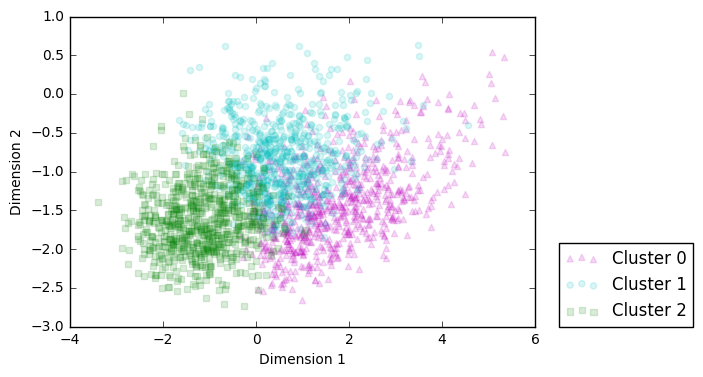

In [15]:
# project training data onto 2-D using principal components
# join with clusters labels
# plot
pca = H2OPrincipalComponentAnalysisEstimator(k=2) # project onto 2 PCs
pca.train(x=X, training_frame=labeled_frame)
features = pca.predict(labeled_frame)
features_pandas = features.as_data_frame()
features_pandas['label'] = labeled_frame[-1].as_data_frame()
print(features_pandas.head())
plot(features_pandas)

In [16]:
# shutdown h2o
h2o.cluster().shutdown(prompt=False)

H2O session _sid_b862 closed.
